In [1]:
import pandas as pd
import numpy
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model.logistic import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

#读取数据
trainData = pd.read_csv('data/train.csv')
trainData.head()

,scode,12-ys,12-lr,12-ro,13-ys,13-lr,13-ro,14-ys,14-lr,14-ro,15-ys,15-lr,15-ro,16-ys,16-lr,16-ro,17-ro
0,300400,-8.205006,-13.820762,18.16,0.000000,0.000000,18.16,10.692793,-8.673529,12.66,-4.591866,-0.157719,8.64,27.601699,62.640479,12.84,17.43
1,2297,22.814957,-199.954056,-6.08,0.000000,0.000000,-6.08,3.585615,114.774347,0.46,-15.994442,-2711.805094,-12.77,61.254196,104.621173,0.45,-4.00
2,2069,-11.204652,-78.778239,4.09,0.482066,-8.267077,3.93,1.577869,-1326.834832,-67.69,2.425382,79.573644,-24.04,11.930615,132.763092,8.47,-99.63
3,300167,-1.932369,-30.428250,2.27,-3.641963,-73.568747,0.74,8.014552,-279.438153,-1.35,43.698091,207.003633,1.45,32.555234,193.463759,4.13,-0.81
4,2422,14.325010,12.564577,13.11,16.074063,-0.735085,11.55,17.451180,-7.190127,9.78,-3.241526,-35.595405,5.91,10.338378,-9.396434,5.21,6.45


In [2]:
testData = pd.read_csv('data/test.csv')
testData.head()

,scode,13-ys,13-lr,13-ro,14-ys,14-lr,14-ro,15-ys,15-lr,15-ro,16-ys,16-lr,16-ro,17-ys,17-lr,17-ro,18-ro
0,2288,34.165422,6.384064,4.04,29.272430,-85.240942,0.56,-12.808341,282.068391,1.68,-1.191840,-334.611816,-3.57,38.957871,176.858477,3.15,2.04
1,415,16.584470,35.753108,7.96,7.456498,-13.237266,10.65,43.411099,42.846443,12.28,146.859379,74.538739,7.79,48.136782,15.527876,8.37,6.80
2,2358,32.927041,35.808203,20.09,-14.711336,-0.255897,15.51,50.188416,-29.536663,8.59,74.724057,81.018662,10.88,20.278760,35.142874,9.49,5.69
3,611,530.082514,124.714077,1.93,-94.177197,-540.738560,-9.16,-49.515140,-608.742070,-96.93,-12.045076,101.440450,2.67,36.709220,-519.737273,-6.04,-14.67
4,2321,-2.931766,-3059.327074,-10.43,4.938232,109.876074,0.86,0.781112,38.982121,1.19,35.381382,423.205798,4.70,63.912672,-33.023324,2.51,4.67


In [3]:
##数据预处理
#净资产收益率小于15%的数据标记为0,大于等于15%的标记为１
def getClass(x):
    if x < 15:
        return 0
    else: return 1

trainData[u'17-ro'] = trainData[u'17-ro'].apply(func = getClass)
testData[u'18-ro'] = testData[u'18-ro'].apply(func = getClass)
ss = StandardScaler()
testData.head()

,scode,13-ys,13-lr,13-ro,14-ys,14-lr,14-ro,15-ys,15-lr,15-ro,16-ys,16-lr,16-ro,17-ys,17-lr,17-ro,18-ro
0,2288,34.165422,6.384064,4.04,29.272430,-85.240942,0.56,-12.808341,282.068391,1.68,-1.191840,-334.611816,-3.57,38.957871,176.858477,3.15,0
1,415,16.584470,35.753108,7.96,7.456498,-13.237266,10.65,43.411099,42.846443,12.28,146.859379,74.538739,7.79,48.136782,15.527876,8.37,0
2,2358,32.927041,35.808203,20.09,-14.711336,-0.255897,15.51,50.188416,-29.536663,8.59,74.724057,81.018662,10.88,20.278760,35.142874,9.49,0
3,611,530.082514,124.714077,1.93,-94.177197,-540.738560,-9.16,-49.515140,-608.742070,-96.93,-12.045076,101.440450,2.67,36.709220,-519.737273,-6.04,0
4,2321,-2.931766,-3059.327074,-10.43,4.938232,109.876074,0.86,0.781112,38.982121,1.19,35.381382,423.205798,4.70,63.912672,-33.023324,2.51,0


In [4]:
##模型训练
#标准化数据，保证每个维度的特征数据方差为1，均值为0。使得预测结果不会被某些维度过大的特征值而主导。
X_train_raw = trainData.iloc[:,1:-1]
y_train = trainData.iloc[:,-1]
X_train = ss.fit_transform(X_train_raw)
classifier=LogisticRegression(solver='liblinear')
#调用LogisticRegression中的fit函数/模块用来训练模型参数
classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [5]:
##测试模型
X_test_raw = testData.iloc[:,1:-1]
y_test = testData.iloc[:,-1]
X_test = ss.transform(X_test_raw)
#使用训练好的模型classifier对X_test进行预测，结果储存在变量predictions
predictions=classifier.predict(X_test)
print ("Accuracy of LR Classifier:", classifier.score(X_test, y_test))

Accuracy of LR Classifier: 0.9082332761578045


TP, FP
FN, TN
 [[1022   19]
 [  88   37]]


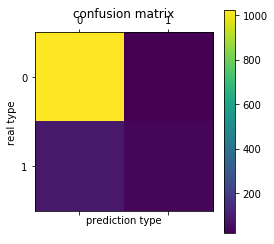

In [6]:
##混淆矩阵
confusion_matrix=confusion_matrix(y_test,predictions)
print('TP, FP\nFN, TN\n',confusion_matrix)
plt.matshow(confusion_matrix)
plt.title('confusion matrix')
plt.colorbar()
plt.ylabel('real type')
plt.xlabel('prediction type')
plt.show()

## 模型准确率：90.82%